<a href="https://colab.research.google.com/github/jmcnerney1/Jack-Mcnerney-Python/blob/main/McNerney_HW_efficientfrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [ ]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [ ]:
tickers = ['ABNB', 'ALL', 'ABT', 'ABBV', 'ACN','LLY','SPY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,ABNB,ALL,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-12-10 00:00:00-05:00,144.710007,94.575790,98.647377,90.688866,232.394455,153.660355,343.849396
2020-12-11 00:00:00-05:00,139.250000,93.687614,99.110435,89.718582,232.082947,152.744110,343.446228
2020-12-14 00:00:00-05:00,130.000000,94.082367,98.897438,87.913071,230.119293,150.711212,341.908539
2020-12-15 00:00:00-05:00,124.800003,95.024338,99.508629,86.748779,233.234695,159.797241,346.530975
2020-12-16 00:00:00-05:00,137.990005,95.472908,99.406776,88.284325,233.612350,164.206635,347.074799
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,134.520004,192.665375,113.713264,176.723465,358.769989,794.910034,592.906433
2024-12-24 00:00:00-05:00,134.990005,194.545959,114.160919,178.318420,361.630005,794.301025,599.496582
2024-12-26 00:00:00-05:00,135.320007,194.645447,114.668251,177.525894,360.429993,792.773682,599.536499


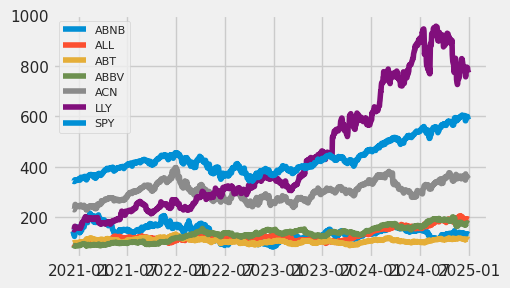

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [ ]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,ABNB,ALL,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-12-10 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-11 00:00:00-05:00,-0.038461,-0.009436,0.004683,-0.010757,-0.001341,-0.005981,-0.001173
2020-12-14 00:00:00-05:00,-0.068736,0.004205,-0.002151,-0.020329,-0.008497,-0.013399,-0.004487
2020-12-15 00:00:00-05:00,-0.040822,0.009962,0.006161,-0.013332,0.013447,0.058540,0.013429
2020-12-16 00:00:00-05:00,0.100469,0.004709,-0.001024,0.017546,0.001618,0.027220,0.001568


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [ ]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,ABNB,ALL,ABT,ABBV,ACN,LLY,SPY
ABNB,0.237854,0.010423,0.020592,0.000950,0.042974,0.003490,0.042208
ALL,0.010423,0.061123,0.013764,0.012802,0.015782,0.008092,0.015057
ABT,0.020592,0.013764,0.046120,0.014508,0.022698,0.013970,0.017410
ABBV,0.000950,0.012802,0.014508,0.046629,0.009919,0.016447,0.009303
ACN,0.042974,0.015782,0.022698,0.009919,0.064634,0.015831,0.029139
LLY,0.003490,0.008092,0.013970,0.016447,0.015831,0.084701,0.015408
SPY,0.042208,0.015057,0.017410,0.009303,0.029139,0.015408,0.026710


### Correlation measures the **degree** to which two securities move in relation to each other.

In [ ]:
corr_matrix =data.corr() * 250
corr_matrix

,ABNB,ALL,ABT,ABBV,ACN,LLY,SPY
ABNB,250.000000,21.611418,49.151473,2.254831,86.647451,6.147361,132.386896
ALL,21.611418,250.000000,64.807763,59.951893,62.772871,28.116380,93.164422
ABT,49.151473,64.807763,250.000000,78.214144,103.934281,55.877613,124.013374
ABBV,2.254831,59.951893,78.214144,250.000000,45.170144,65.427728,65.904677
ACN,86.647451,62.772871,103.934281,45.170144,250.000000,53.490857,175.328499
LLY,6.147361,28.116380,55.877613,65.427728,53.490857,250.000000,80.984441
SPY,132.386896,93.164422,124.013374,65.904677,175.328499,80.984441,250.000000


In [ ]:
portfolio1 = data[['ALL','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,ALL,LLY
ALL,0.061123,0.008092
LLY,0.008092,0.084701


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [ ]:
w = {'MMM': 0.1, 'LLY': 0.2, 'AOS': 0.2, 'ABT': 0.1, 'ABBV': 0.2, 'ACN': 0.05, 'SPY': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.01211596140541316)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [ ]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-11-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
ABNB,0.052037
ALL,0.187603
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [ ]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.14797489880519565)

## Calculate the volatility, or the annualized standard deviation.

In [ ]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
ABNB,0.487942
ALL,0.247352
ABT,0.214861
ABBV,0.216043
ACN,0.254358
LLY,0.291177
SPY,0.163512


In [ ]:
data.std()*np.sqrt(250)

,0
ABNB,0.487703
ALL,0.247231
ABT,0.214756
ABBV,0.215938
ACN,0.254233
LLY,0.291035
SPY,0.163432


## Create a table for returns and volatility of assets.

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ABNB,0.052037,0.487942
ALL,0.187603,0.247352
ABT,0.041581,0.214861
ABBV,0.185137,0.216043
ACN,0.153931,0.254358
LLY,0.487153,0.291177
SPY,0.155179,0.163512


In [ ]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ABNB weight,ALL weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.159574,2.878234,0.210954,0.127949,0.143882,0.063363,0.169835,0.110438,0.173580
1,0.243212,2.466381,0.080163,0.224518,0.049029,0.264894,0.064486,0.261273,0.055637
2,0.215647,2.740318,0.175630,0.022435,0.076741,0.172861,0.130621,0.245674,0.176038
3,0.146491,3.717462,0.403242,0.279448,0.000995,0.121564,0.029732,0.061301,0.103718
4,0.162098,2.549252,0.134036,0.065292,0.185888,0.201271,0.178152,0.102226,0.133134


<Axes: xlabel='Volatility', ylabel='Returns'>

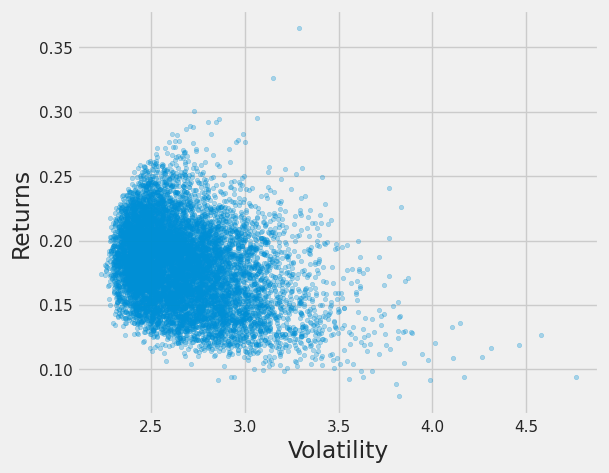

In [ ]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])

In [ ]:
tickers = ['GOOD', 'CVS', 'C', 'KO', 'DAY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

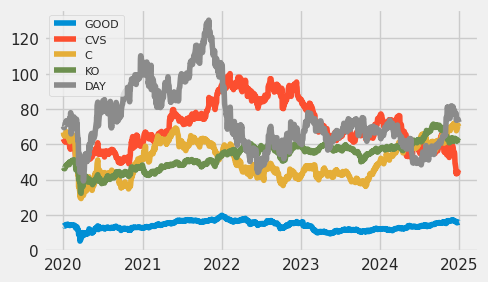

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,GOOD,CVS,C,KO,DAY
Date,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,0.004691,-0.007988,-0.019015,-0.005471,-0.007310
2020-01-06 00:00:00-05:00,-0.000469,0.003934,-0.003142,-0.000365,-0.001440
2020-01-07 00:00:00-05:00,-0.014619,-0.003798,-0.008722,-0.007712,0.010034
2020-01-08 00:00:00-05:00,0.001424,-0.012582,0.007589,0.001842,0.003844


In [ ]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,GOOD,CVS,C,KO,DAY
GOOD,0.175574,0.036476,0.094929,0.038984,0.073187
CVS,0.036476,0.093591,0.052351,0.026491,0.035325
C,0.094929,0.052351,0.152919,0.040472,0.078946
KO,0.038984,0.026491,0.040472,0.043336,0.029165
DAY,0.073187,0.035325,0.078946,0.029165,0.214916


In [ ]:
corr_matrix =data.corr() * 250
corr_matrix

,GOOD,CVS,C,KO,DAY
GOOD,250.000000,71.137776,144.836613,111.731632,94.190330
CVS,71.137776,250.000000,109.401163,103.992857,62.268109
C,144.836613,109.401163,250.000000,124.290974,108.869587
KO,111.731632,103.992857,124.290974,250.000000,75.550105
DAY,94.190330,62.268109,108.869587,75.550105,250.000000


In [ ]:
portfolio1 = data[['CVS','C']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,CVS,C
CVS,0.093591,0.052351
C,0.052351,0.152919


In [ ]:
w = {'GOOG': 0.1, 'CVS': 0.2, 'C': 0.2, 'CO': 0.1, 'DAY': 0.2}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.031786834940326955)

In [ ]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-33-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
GOOD,0.105268
CVS,-0.018286
C,0.099387
KO,0.065057
DAY,-0.069823


In [ ]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.019288087053396415)

In [ ]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
GOOD,0.419182
CVS,0.306047
C,0.391205
KO,0.208256
DAY,0.463775


In [ ]:
data.std()*np.sqrt(250)

,0
GOOD,0.419015
CVS,0.305926
C,0.391049
KO,0.208173
DAY,0.463591


In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
GOOD,0.105268,0.419182
CVS,-0.018286,0.306047
C,0.099387,0.391205
KO,0.065057,0.208256
DAY,-0.069823,0.463775


In [ ]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,GOOD weight,CVS weight,C weight,KO weight,DAY weight
0,0.057597,3.994414,0.329379,0.188091,0.121417,0.292927,0.068185
1,0.045841,4.810472,0.295331,0.003530,0.251560,0.157221,0.292358
2,0.042926,3.980881,0.158969,0.120016,0.217385,0.310989,0.192642
3,0.026212,4.802911,0.292182,0.169429,0.194607,0.023837,0.319946
4,0.023352,4.032276,0.230612,0.229655,0.061530,0.226493,0.251710


<Axes: xlabel='Volatility', ylabel='Returns'>

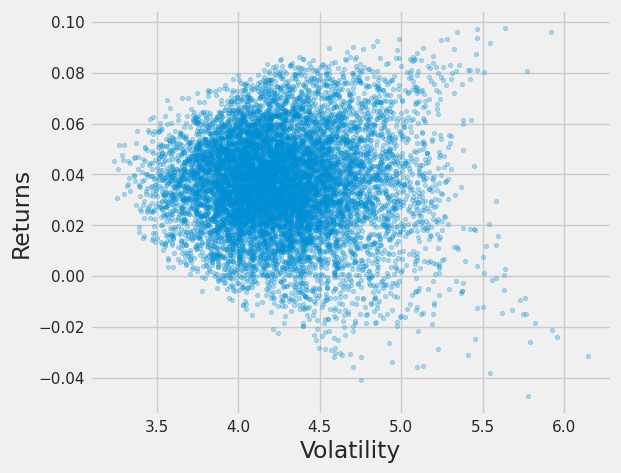

In [ ]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])